In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
um_per_pixel = 0.117
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_D to organization_exclude hypothesis/RNA_PAINT"
os.chdir(folder_save)

fname = "20221031-FL_noTR_20ms_Replicate1_FOV-7-RNAs-spots_reformatted.csv"
df = pd.read_csv(fname)
fname_condensate = "condensates_AIO-20221031-FL_noTR_noDex_20ms_0hr_Replicate1_FOV-7-condensates_AveProj_Simple Segmentation.csv"
df_condensate = pd.read_csv(fname_condensate)

plow = 5  # imshow intensity percentile
phigh = 95
line_color = "white"  # #00274C
scalebar_color = "white"

# color
color_condensate_edge = "#a7cced"
cmap_color_start = "black"
cmap_color_end = "#c61a3e"
cmap_name = "dark2red"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=100,
)


scalebar_length_um = 5
scalebar_length_pxl = scalebar_length_um / um_per_pixel

## Construct PAINT image

In [3]:
scaling_factor = 2
um_per_pixel_PAINT = um_per_pixel / scaling_factor
xedges = np.arange((418 + 1) * scaling_factor)
yedges = np.arange((674 + 1) * scaling_factor)
img_PAINT, _, _ = np.histogram2d(
    x=df["x"] * scaling_factor, y=df["y"] * scaling_factor, bins=(xedges, yedges)
)


scalebar_length_pxl = scalebar_length_um * scaling_factor / um_per_pixel

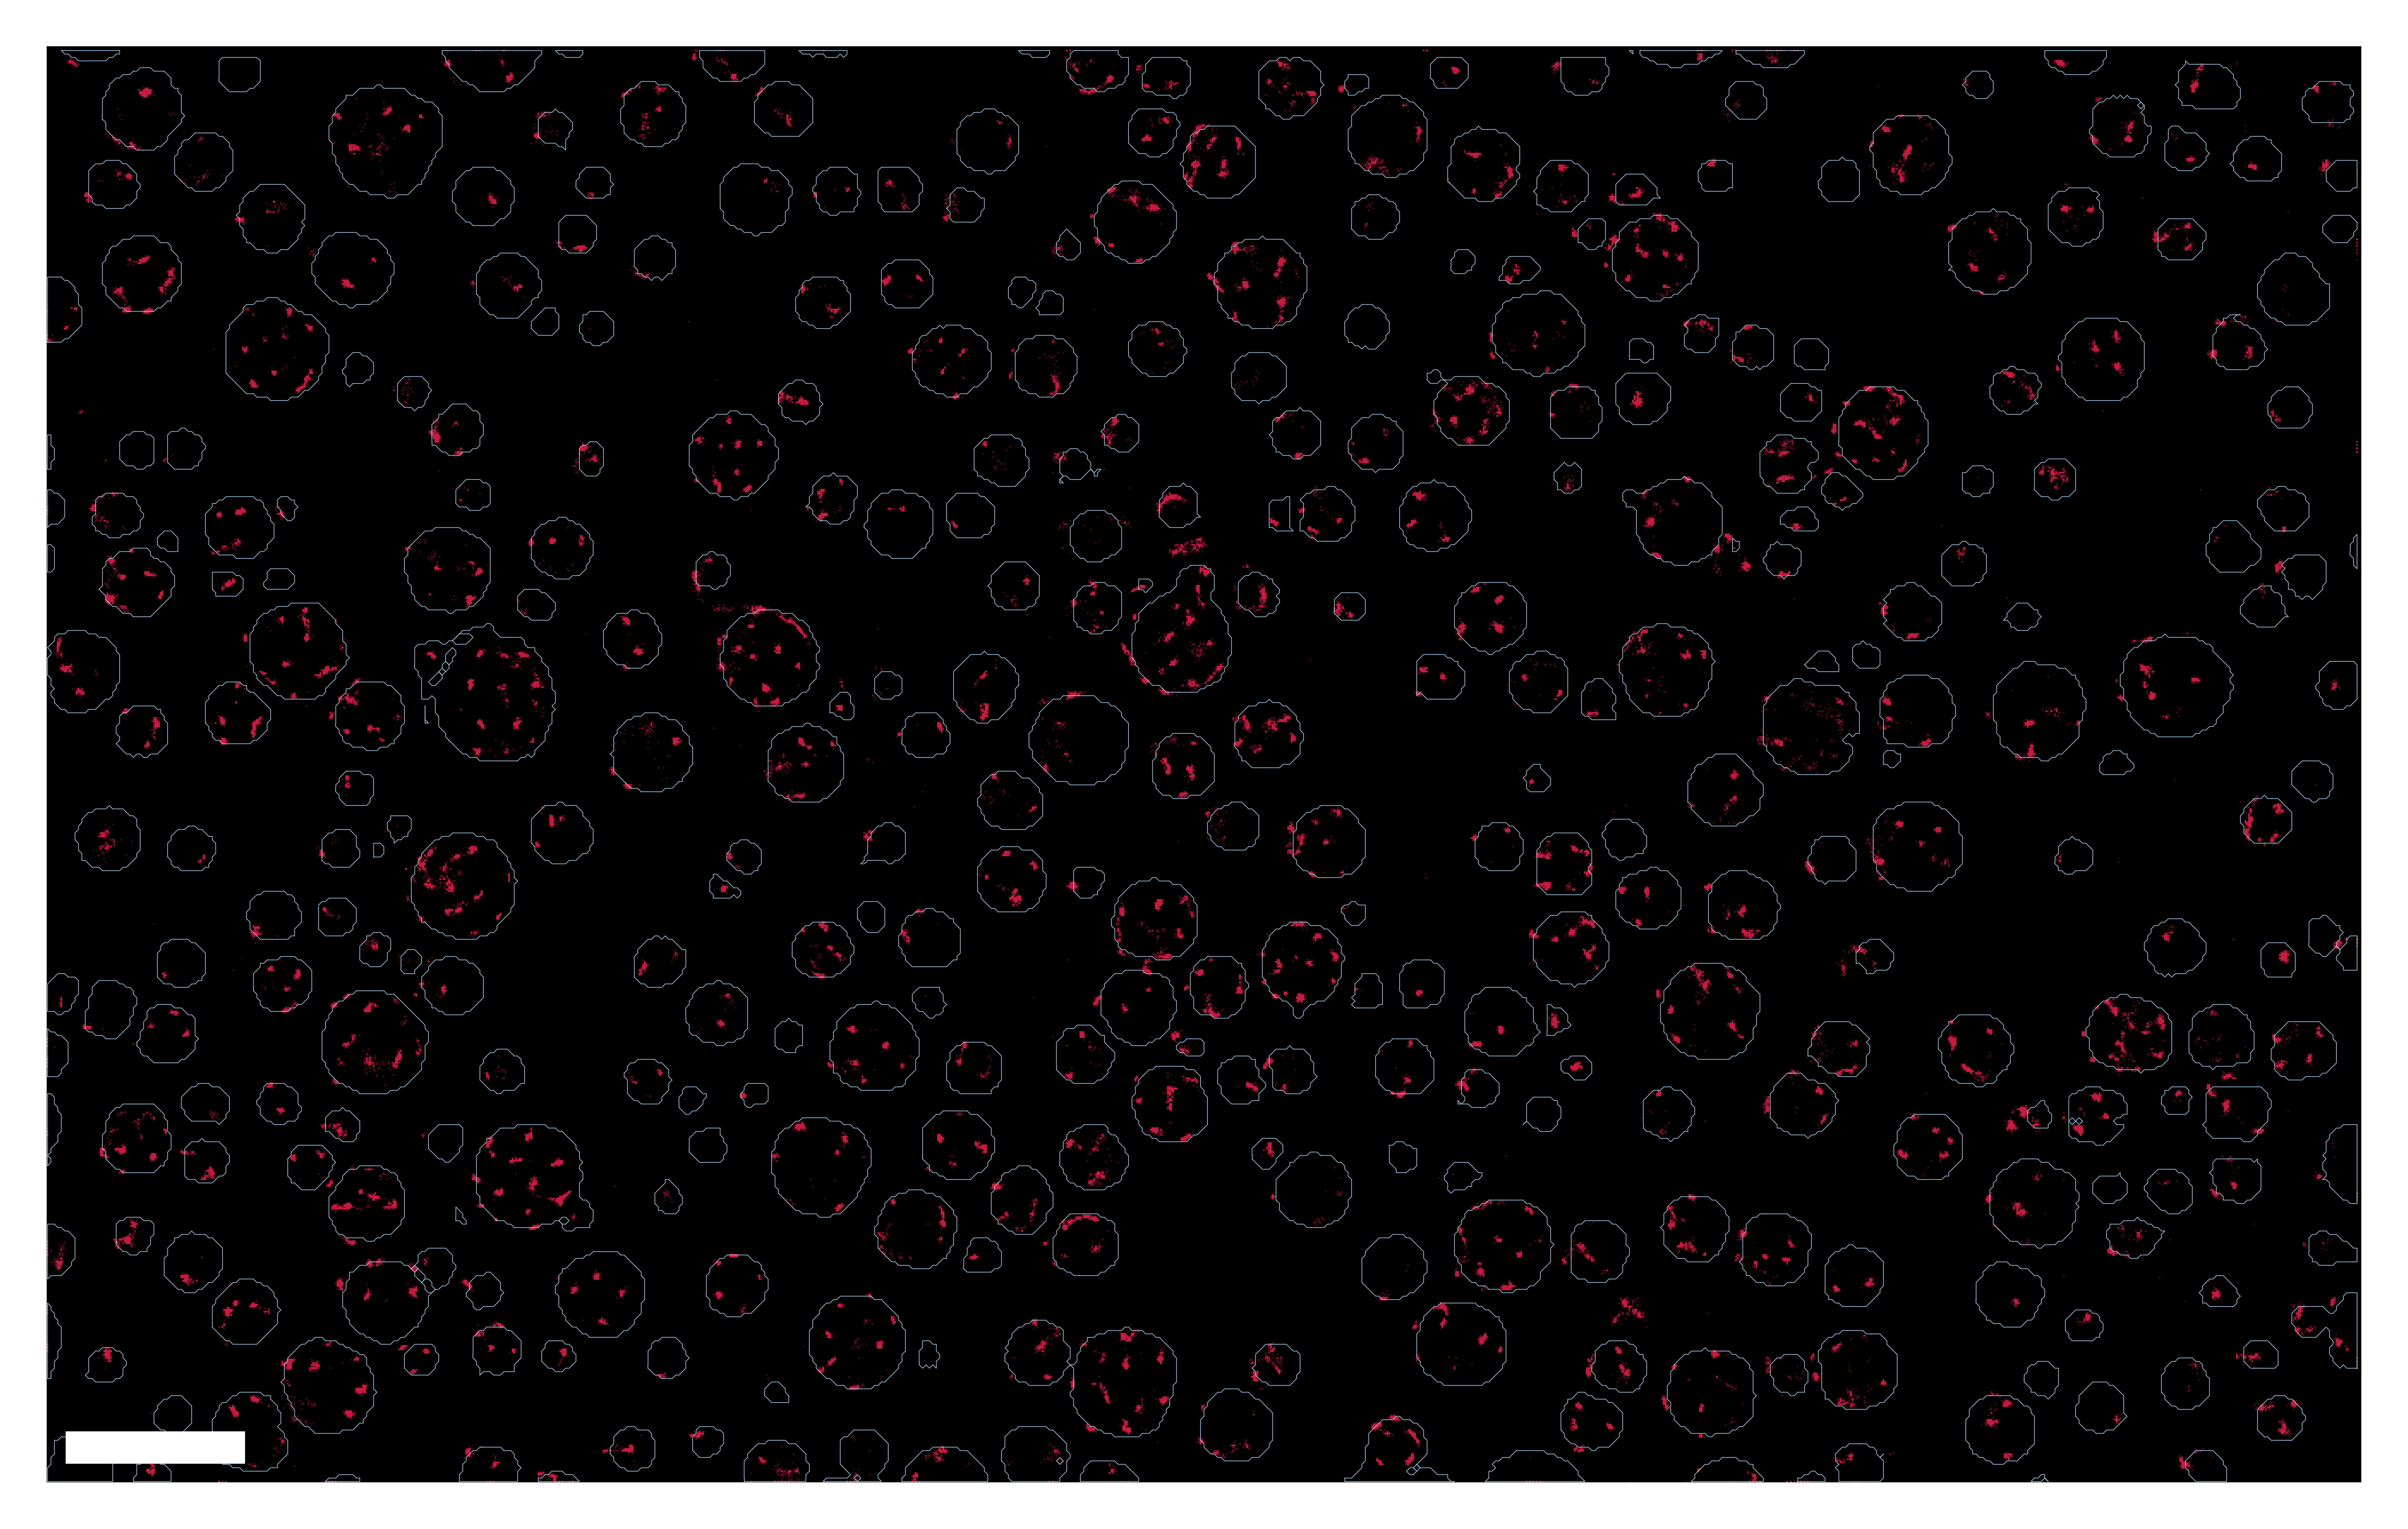

In [5]:
scale_bar_offset = 20

plt.figure(dpi=1200)
# PAINT
plt.imshow(
    img_PAINT,
    cmap=cmap,
    vmin=0,
    vmax=3,
    resample=False,
)

# plot condensate boundaries, with swapped x and y
for condensateID in df_condensate["condensateID"].unique():
    str_condensate_coords = df_condensate[
        df_condensate["condensateID"] == condensateID
    ]["contour_coord"].squeeze()
    x = []
    y = []
    for str_condensate_xy in str_condensate_coords[2:-2].split("], ["):
        xy = str_condensate_xy.split(", ")
        # swapped x and y
        y.append(int(xy[0]) * scaling_factor)
        x.append(int(xy[1]) * scaling_factor)
    plt.plot(x, y, "-", color=color_condensate_edge, linewidth=0.1)
    # still the last closing line will be missing, get it below
    xlast = [x[-1], x[0]]
    ylast = [y[-1], y[0]]
    plt.plot(xlast, ylast, "-", color=color_condensate_edge, linewidth=0.1)

# scale bar
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=5,
)
plt.gca().invert_yaxis()
plt.axis("scaled")
plt.axis("off")
fname_save = fname.split("RNA")[0] + "PAINT_overview.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=1200)
plt.show()